In [27]:
# import classic libraries
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

### **1. Load the Data**

In [28]:
X = np.array([
    
    [2,1],
    [1,-1],
    [-1,-2],
    [-2,1]])
    
print(X)

[[ 2  1]
 [ 1 -1]
 [-1 -2]
 [-2  1]]


In [29]:
Y = np.array([1, 0, 0, 1]) # labels
print(Y)

[1 0 0 1]


### **2. Define Activation Function** `Unit Step AF`

In [30]:
def step_af(z):
    return 1 if z>=0 else 0

### **3. Compute Cost Function**

In [38]:
def compute_cost(X,Y,W,b):
    total_errors = 0
    for i in range(len(X)):
        z = np.dot(W,X[i]) + b
        y_pred = step_af(z)
        if y_pred != Y[i]:
            total_errors += 1
    return total_errors

### **3. Define Single Layer Perceptron (SLP) Model**

In [39]:
# Perceptron training function with formatted logging, cost and accuracy tracking
def slp_train(X, Y, W, b, alpha, epochs):
    errors_per_epoch = []
    accuracy_per_epoch = []

    # Suppress scientific notation and control decimals
    np.set_printoptions(precision=3, suppress=True)

    for epoch in range(epochs):
        print(f"\nEpoch# {epoch + 1}")
        total_errors = 0
        correct = 0

        for i in range(len(X)):
            x = X[i]
            y = Y[i]

            z = np.dot(W, x) + b
            y_pred = step_af(z)
            error = y_pred - y

            if error != 0:
                W = W - alpha * error * x
                b = b - alpha * error
                total_errors += 1
            else:
                correct += 1

            cost = compute_cost(X, Y, W, b)

            # Well-formatted log output
            print(f"{'Input:':<10} {x}  "
                  f"{'Prediction:':<12} {y_pred}  "
                  f"{'Actual:':<8} {y}  "
                  f"{'Error:':<7} {error}  "
                  f"{'Weights:':<9} {W}  "
                  f"{'Bias:':<6} {b:.3f}  "
                  f"{'Cost:':<6} {cost}")

        errors_per_epoch.append(total_errors)
        accuracy_per_epoch.append(correct / len(X))

    return W, b, errors_per_epoch, accuracy_per_epoch

### let us try running the `SLP` with initial weights and bias

In [40]:
W = np.array([0.5, -0.5]) # weights initialized as many as features
b = 0.1
alpha = 0.1
epochs = 10

In [41]:
final_W, final_b, errors, accuracy =slp_train(X,Y,W,b,alpha, epochs=10)


Epoch# 1
Input:     [2 1]  Prediction:  1  Actual:  1  Error:  0  Weights:  [ 0.5 -0.5]  Bias:  0.100  Cost:  3
Input:     [ 1 -1]  Prediction:  1  Actual:  0  Error:  1  Weights:  [ 0.4 -0.4]  Bias:  0.000  Cost:  3
Input:     [-1 -2]  Prediction:  1  Actual:  0  Error:  1  Weights:  [ 0.5 -0.2]  Bias:  -0.100  Cost:  2
Input:     [-2  1]  Prediction:  0  Actual:  1  Error:  -1  Weights:  [ 0.3 -0.1]  Bias:  0.000  Cost:  2

Epoch# 2
Input:     [2 1]  Prediction:  1  Actual:  1  Error:  0  Weights:  [ 0.3 -0.1]  Bias:  0.000  Cost:  2
Input:     [ 1 -1]  Prediction:  1  Actual:  0  Error:  1  Weights:  [0.2 0. ]  Bias:  -0.100  Cost:  2
Input:     [-1 -2]  Prediction:  0  Actual:  0  Error:  0  Weights:  [0.2 0. ]  Bias:  -0.100  Cost:  2
Input:     [-2  1]  Prediction:  0  Actual:  1  Error:  -1  Weights:  [-0.   0.1]  Bias:  0.000  Cost:  0

Epoch# 3
Input:     [2 1]  Prediction:  1  Actual:  1  Error:  0  Weights:  [-0.   0.1]  Bias:  0.000  Cost:  0
Input:     [ 1 -1]  Prediction

In [42]:
len(errors)

10

In [43]:
len(accuracy)

10

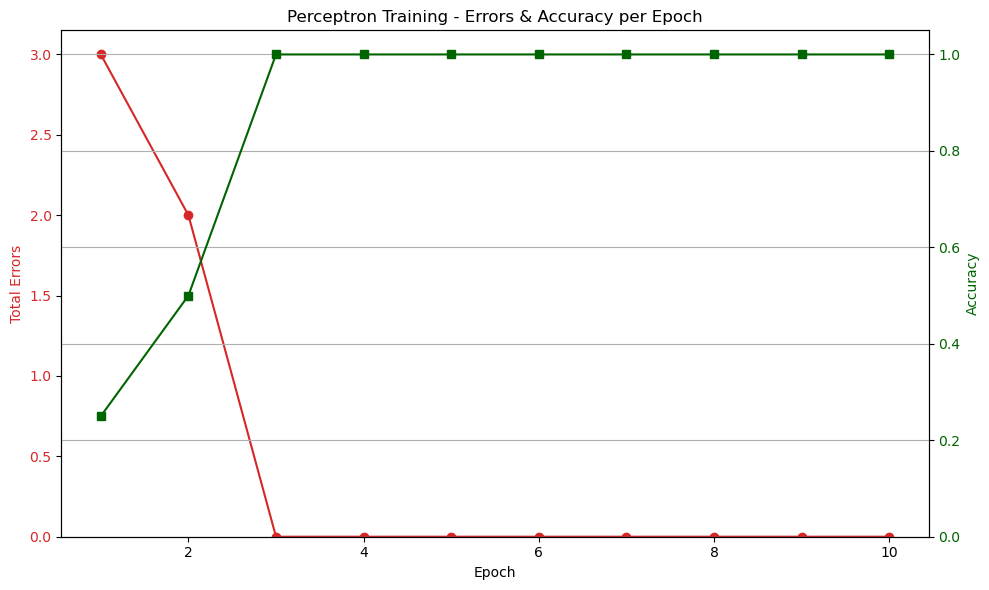

In [44]:
# === Plot errors and accuracy ===
fig, ax1 = plt.subplots(figsize=(10,6))

color = 'tab:red'
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Total Errors', color=color)
ax1.plot(range(1, epochs + 1), errors, marker='o', color=color, label='Errors')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(bottom=0)

ax2 = ax1.twinx()
color = 'darkgreen'
ax2.set_ylabel('Accuracy', color=color)
ax2.plot(range(1, epochs + 1), accuracy, marker='s', color=color, label='Accuracy')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0, 1.05)

plt.title("Perceptron Training - Errors & Accuracy per Epoch")
fig.tight_layout()
plt.grid(True)
plt.show()
